# Cantilever With point load at mid point
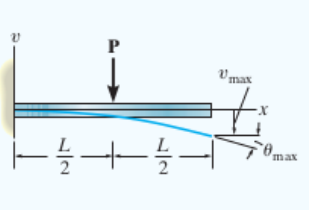

In [1]:
import sympy as sym
from sympy import DiracDelta
from sympy import Piecewise

In [10]:
x=sym.symbols('x')
a, L, P, E,I,M_0=sym.symbols('a,L,P,E,I,M_0',positive=True)
w=sym.Function('w')(x)

In [4]:
load = P/(E*I)
load

P/(E*I)

In [5]:
eq = sym.Eq(sym.diff(w,(x,4)),load)
eq

Eq(Derivative(w(x), (x, 4)), P/(E*I))

In [6]:
soln0=sym.dsolve(eq)
soln1=soln0.rewrite(Piecewise).simplify()
wsoln_interim=soln1.rhs
wsoln_interim

C1 + C2*x + C3*x**2 + C4*x**3 + P*x**4/(24*E*I)

In [7]:
bc1_lhs = wsoln_interim.subs(x,0)
bc1_rhs=0
bc1_eq=sym.Eq(bc1_lhs,bc1_rhs)
display(bc1_eq)

Eq(C1, 0)

In [8]:
bc2_lhs = sym.diff(wsoln_interim,(x,3)).subs(x,L)
bc2_rhs=0
bc2_eq=sym.Eq(bc2_lhs,bc2_rhs)
display(bc2_eq)

Eq(6*C4 + L*P/(E*I), 0)

In [9]:
bc3_lhs = sym.diff(wsoln_interim,x).subs(x,0)
bc3_rhs=0
bc3_eq=sym.Eq(bc3_lhs,bc3_rhs)
display(bc3_eq)

Eq(C2, 0)

In [22]:
bc4_lhs = sym.diff(wsoln_interim,(x,2)).subs(x,L)-M_0/(E*I)
bc4_rhs=0
bc4_eq=sym.Eq(bc4_lhs,bc4_rhs)
display(bc4_eq)

Eq(2*C3 + 6*C4*L + L**2*P/(2*E*I) - M_0/(E*I), 0)

In [23]:
constants = sym.solve([bc1_lhs,bc2_lhs,bc3_lhs,bc4_lhs])
display(constants)

{C1: 0, C3: (L**2*P + 2*M_0)/(4*E*I), C4: -L*P/(6*E*I), C2: 0}

In [25]:
wsoln_interim.subs(constants).simplify().subs(P,0)

M_0*x**2/(2*E*I)